<img src="../.images/logosnb.png" alt="Banner" style="width:800px;"/>

<div style='color: #690027;' markdown="1">
    <h1>BINAIRE CLASSIFICATIE MET NEURAAL NETWERK MET TWEE VERBORGEN LAGEN</h1> 
</div>

<div class="alert alert-box alert-success">
In deze notebook bouw je een neuraal netwerk op met de functionaliteiten van de Python-module Keras. Het probleem is er een van <b>binaire classificatie</b>: gevens onderverdelen in twee klassen, die niet lineair scheidbaar zijn.<br> 
In het netwerk gebruik je <b>activatiefuncties</b>, zoals de ReLU- en de sigmoïde-functie. <br>
Je zal gebruik maken van <b>twee verborgen lagen</b>.
</div>

### De nodige modules importeren

In deze notebook bouw je een *Sequential model* op met Keras. Dat is een model dat bestaat uit *aaneengeschakelde lagen*. 
Je zal werken met een input layer, een output layer en ertussen **twee hidden layers**.<br>
Je zal dus het model en de lagen moeten kunnen aanmaken.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from keras import models
from keras import layers
from keras import optimizers

Using TensorFlow backend.


Je gaat aan de slag met 60 gegeven punten in het vlak. Sommige punten zijn blauw, andere zijn groen. De punten vertegenwoordigen twee klassen. <br> Van elk punt is de coördinaat en de kleur gegeven.<br>
Het is de bedoeling dat de groene en blauwe punten van elkaar gescheiden worden. 

<div style='color: #690027;' markdown="1">
    <h2>1. Inlezen van de data</h2> 
</div>

Lees met de module `pandas` de dataset in.

In [2]:
punten = pd.read_csv("parabolen.dat")  # in te lezen tabel heeft geen hoofding

<div style='color: #690027;' markdown="1">
    <h2>2. Tonen van de ingelezen data</h2> 
</div>

Bekijk de data door de instructie `punten` uit te voeren. De dataset bestaat uit de x- en y-coördinaat van de punten en de kleur van elk punt. <br>
De x- en y-coördinaat zijn kenmerken, de kleur is een label. <br> Omdat er twee soorten labels zijn, zegt men dat de punten verdeeld zijn over **twee klassen**.

In [3]:
punten

,x,y,kleur
0,-20,900,blauw
1,-18,824,blauw
2,-16,756,blauw
3,-14,696,blauw
4,-12,644,blauw
5,-10,600,blauw
6,-8,564,blauw
7,-6,536,blauw
8,-4,516,blauw
9,-2,504,blauw


Deze tabel is een tabel met 60 rijen en 3 kolommen: er zijn immers 60 punten, 2 kenmerken en 1 label. <br><br>
De kenmerken:
- eerste kolom: x-coördinaat; 
- tweede kolom: y-coördinaat.

Het label:
- derde kolom: kleur.



<div class="alert alert-box alert-info">
In machinaal leren worden twee kenmerken doorgaans weergegeven met x1 en x2 en het label met y.
</div>

<div style='color: #690027;' markdown="1">
    <h2>3. Onderzoeken of de punten van elkaar gescheiden kunnen worden</h2> 
</div>

Of punten scheidbaar zijn, zie je het best op een grafiek. 

Om de data te visualiseren, heb je de x- en y-coördinaat, dus de kenmerken x1 en x2, van de punten nodig.<br>
Daarnaast moet je ook rekening houden met de kleur.

<div style='color: #690027;' markdown="1">
    <h3>3.1 Verschillende soorten data opslaan in verschillende NumPy arrrays</h3> 
</div>

In [4]:
x1 = punten["x"]
x2 = punten["y"]
y = punten["kleur"]

x1 = np.array(x1)
x2 = np.array(x2)

# labels numeriek weergeven
y[y == 'blauw'] = 0
y[y == 'groen'] = 1

# te onthouden voor testset
mean1 = np.mean(x1)
mean2 = np.mean(x2)
std1 = np.std(x1)
std2 = np.std(x2)

# datapunten standaardiseren
x1 = (x1 - np.mean(x1))/np.std(x1)
x2 = (x2 - np.mean(x2))/np.std(x2)
X = np.stack((x1, x2), axis=1)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


<div style='color: #690027;' markdown="1">
    <h3>3.2 De data weergeven in puntenwolk</h3> 
</div>

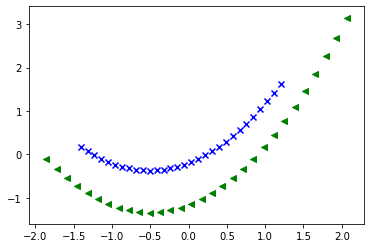

In [5]:
plt.figure()     

plt.scatter(x1[:30], x2[:30], color="blue", marker="x")    
plt.scatter(x1[30:], x2[30:], color="green", marker="<") 
#plt.savefig("tweeparabolen.jpg", dpi=300)

plt.show()

De punten zijn niet lineair scheidbaar maar wel scheidbaar door een kromme.

<div style='color: #690027;' markdown="1">
    <h2>4. Opbouw van een neuraal netwerk</h2> 
</div>

<div style='color: #690027;' markdown="1">
    <h3>4.1 Data opsplitsen</h3> 
</div>

In [6]:
# data verdelen in training- en validatiedata
x1_val = np.append(x1[10:15],x1[40:45])
x2_val = np.append(x2[10:15],x2[40:45]) 
X_val = np.stack((x1_val, x2_val), axis=1)    # juiste formaat, axis=1 zet x1 en x2 als kolommen
x1_train = np.append(np.append(x1[0:10], x1[15:40]), x1[45:])
x2_train = np.append(np.append(x2[0:10], x2[15:40]), x2[45:])
X_train = np.stack((x1_train, x2_train), axis=1)  

y_val =  np.append(y[0:5], y[30:35])
y_train = np.append(y[5:30], y[35:])

# data voorbereiden
# labels numeriek weergeven
# y[y == 'blauw'] = 0 # FOUT
# y[y == 'groen'] = 1 # FOUT
# print(y)
# print(len(y))
#print(type(y))
# y = np.append(np.zeros((30,1)),np.ones((30,1)))
# y_val =  utils.to_categorical(np.append(y[0:5], y[30:35]))
# y_train = utils.to_categorical(np.append(y[5:30], y[35:]))


In [7]:
print(y_val)

[0 0 0 0 0 1 1 1 1 1]


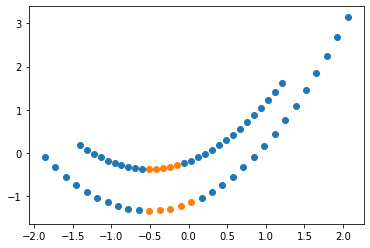

In [8]:
# plt.scatter(X_train[:,0],X_train[:,1])
# plt.scatter(X_val[:,0],X_val[:,1])
# plt.savefig("parabolen_validzelfgekozen.jpg", dpi=300)
plt.scatter(x1_train, x2_train)
plt.scatter(x1_val, x2_val)


<div style='color: #690027;' markdown="1">
    <h3>4.2 Architectuur van het neuraal netwerk</h3> 
</div>

In [9]:
# architectuur netwerk
network = models.Sequential()
network.add(layers.Dense(8, activation="relu", input_dim=2))    # eerste hidden layer: 8 neuronen, activatie ReLU       
# network.add(layers.Dropout(0.8))
network.add(layers.Dense(4, activation="relu"))                 # tweede hidden layer: 4 neuronen, activatiefunctie ReLU      
network.add(layers.Dense(1, activation="sigmoid"))              # output layer: 1 output neuron, activatiefunctie
# sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
sgd = optimizers.SGD(lr=0.1)
network.compile(optimizer=sgd,
                loss="binary_crossentropy",
                metrics=["accuracy"])                            # optimizer, loss en metrics kiezen

<div style='color: #690027;' markdown="1">
    <h3>4.3 Trainen van het neuraal netwerk</h3> 
</div>

In [10]:
# trainen van het netwerk met methode `fit`, m.a.w. punten en labels op elkaar afstemmen
# 40 epochs
history = network.fit(X_train, y_train, epochs=40, validation_data=(X_val,y_val))

Train on 50 samples, validate on 10 samples
Epoch 1/40
50/50 [==============================] - 0s 4ms/step - loss: 0.7399 - accuracy: 0.4800 - val_loss: 0.7087 - val_accuracy: 0.5000
Epoch 2/40
50/50 [==============================] - 0s 212us/step - loss: 0.7186 - accuracy: 0.6600 - val_loss: 0.6913 - val_accuracy: 0.6000
Epoch 3/40
50/50 [==============================] - 0s 279us/step - loss: 0.7035 - accuracy: 0.7200 - val_loss: 0.6743 - val_accuracy: 0.6000
Epoch 4/40
50/50 [==============================] - 0s 171us/step - loss: 0.6917 - accuracy: 0.7600 - val_loss: 0.6587 - val_accuracy: 0.8000
Epoch 5/40
50/50 [==============================] - 0s 248us/step - loss: 0.6813 - accuracy: 0.7200 - val_loss: 0.6440 - val_accuracy: 0.9000
Epoch 6/40
50/50 [==============================] - 0s 249us/step - loss: 0.6724 - accuracy: 0.7000 - val_loss: 0.6324 - val_accuracy: 1.0000
Epoch 7/40
50/50 [==============================] - 0s 165us/step - loss: 0.6657 - accuracy: 0.7000 - val_

In [11]:
loss = history.history["loss"]
epochs = range (1 , len(loss) +1)
accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

<div style='color: #690027;' markdown="1">
    <h3>4.4 Prestatie van het model</h3> 
</div>

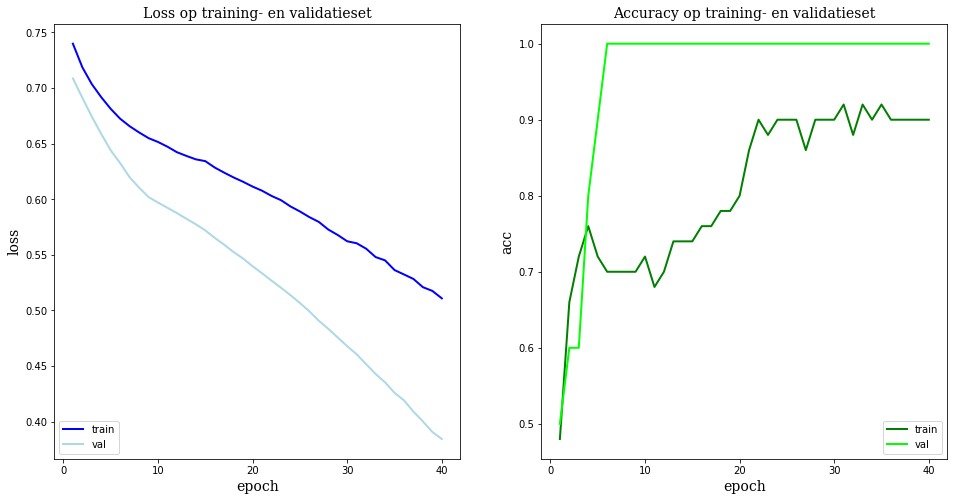

In [12]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(epochs, loss, color="blue", label="train", linewidth=2)
plt.plot(epochs, val_loss, color="lightblue", label="val", linewidth=2)
plt.xticks(np.arange(0, 41, step=10))             
plt.title("Loss op training- en validatieset", fontdict=font)
plt.xlabel("epoch", fontdict=font)
plt.ylabel("loss", fontdict=font)
plt.legend(loc="lower left")

plt.subplot(1,2,2)
plt.plot(epochs, accuracy, color="green", label="train", linewidth=2)
plt.plot(epochs, val_acc, color="lime", label="val", linewidth=2)
plt.xticks(np.arange(0, 41, step=10)) 

plt.xlabel("epoch", fontdict=font)
plt.ylabel("acc", fontdict=font)

plt.title("Accuracy op training- en validatieset", fontdict=font)
plt.legend(loc="lower right")

# plt.savefig("parabolen_2layers_40epochs_30aug2020.jpg", dpi=300)
plt.show()

Wat merk je op?<br>
Het model underfits / is optimaal / overfits.

<div style='color: #690027;' markdown="1">
    <h3>4.5 Testen van het model</h3> 
</div>

Test het model uit op de testset.<br>
Daarvoor moet eerst de data worden voorbereid, ze moet op dezelfde manier worden gestandaardiseerd.

In [13]:
# testset inladen
testset = pd.read_csv("testsetparabolen.dat") 

In [14]:
print(testset)

    x     y  kleur
0   1   501  blauw
1  25  1125  blauw
2 -20   200  groen
3  58  3164  groen


In [15]:
# data voorbereiden
x1_test = testset["x"]
x2_test = testset["y"]
x1_test = np.array(x1_test)
x2_test = np.array(x2_test)

y_test = testset["kleur"]
y_test[y_test == 'blauw'] = 0
y_test[y_test == 'groen'] = 1

x1_test = (x1_test - mean1) / std1 
x2_test = (x2_test - mean2) / std2
X_test = np.stack((x1_test, x2_test), axis=1)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [16]:
print(X_test)

[[-0.4620959  -0.36968357]
 [ 0.61988475  0.49241252]
 [-1.40882898 -0.7855344 ]
 [ 2.10760815  3.30942202]]


In [17]:
# alle testpunten
predictions = network.predict_classes(X_test)
for i in range(4):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], y_test[i]))

[-0.4620959043360658, -0.36968356622272563] => 0 (expected 0)
[0.6198847497191127, 0.4924125234302701] => 0 (expected 0)
[-1.408828976634347, -0.785534404340597] => 1 (expected 1)
[2.107608149044983, 3.3094220215111325] => 1 (expected 1)


<div style='color: #690027;' markdown="1">
    <h2>5. Decision boundary</h2> 
</div>

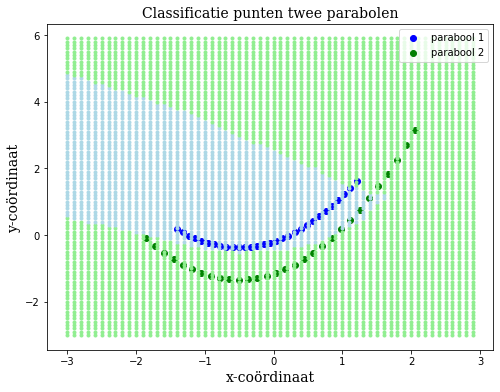

In [18]:
# decision boundary
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
color = ["blue", "green"]
soort = ["parabool 1", "parabool 2"]
                 

plt.figure(figsize=(8, 6))

for target in range(2):
    X_plot = X[y == target]
    plt.scatter(X_plot[:, 0], X_plot[:, 1], marker='o', color=color[target], label=soort[target])
plt.title("Classificatie punten twee parabolen", fontdict=font)
plt.xlabel("x-coördinaat", fontdict=font)
plt.ylabel("y-coördinaat", fontdict=font)
plt.legend(loc="upper right")

x1 = np.linspace(-2, 2, 40)
x2 = np.linspace(-2, 5, 40)

# resolutie
xx1 = np.arange(x1.min()-1, x1.max()+1, 0.1)
xx2 = np.arange(x2.min()-1, x2.max()+1, 0.1)                     

for a in xx1:
    for b in xx2:
        P = np.array([[a, b]])
        voorspeldeklasse = network.predict_classes(P) 
        if voorspeldeklasse == 0:
            kleur = "lightblue"
        else:
            kleur = "lightgreen"
        plt.plot(a, b, marker='.', color=kleur)

plt.show()

<div class="alert alert-box alert-info">
De data bestaan uit punten met twee <b>kenmerken</b> en een overeenkomstig <b>label</b>. Het label kan twee waarden aannemen; er zijn twee <b>klassen</b>. Een grens tussen de klassen is een <b>decision boundary</b>. <br>
Het model is een neuraal netwerk met een <b>invoerlaag</b>, twee <b>verborgenen lagen</b> met activatiefunctie ReLU en een <b>uitvoerlaag</b> met activatiefunctie de sigmoïde-functie. <br>
    
De klassen zijn niet lineair scheidbaar, maar kunnen toch van elkaar gescheiden worden m.b.v. de <b>niet-lineaire functie ReLU</b>.  
</div>

<img src="../.images/cclic.png" alt="Banner" align="left" style="width:80px;"/><br><br>
Notebook KIKS, zie <a href="http://www.aiopschool.be">ai op school</a>, van F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>.